# Projeto 06 - Safra 😎

| Coluna            | Tipo da variável                   |                                           Descrição |
| :---------------- | :--------------------------------- | --------------------------------------------------: |
| LoanNr_ChkDgt     | Quantitativa Discreta              |                              Identifier Primary key |
| Name              | Qualitativa Nominal                |                                       Borrower name |
| City              | Qualitativa Nominal                |                                       Borrower city |
| State             | Qualitativa Nominal                |                                      Borrower state |
| Zip               | Qualitativa Nominal                |                                   Borrower zip code |
| Bank              | Qualitativa Nominal                |                                           Bank name |
| BankState         | Qualitativa Nominal                |                                          Bank state |
| NAICS             | Qualitativa Ordinal                |  North American industry classification system code |
| ApprovalDate      | Qualitativa Ordinal                |                          Date SBA commitment issued |
| ApprovalFY        | Quantitativa Discreta              |                           Fiscal year of commitment |
| Term              | Quantitativa Discreta              |                                 Loan term in months |
| NoEmp             | Quantitativa Discreta              |                        Number of business employees |
| NewExist          | Qualitativa Nominal                |             1 = Existing business, 2 = New business |
| CreateJob         | Quantitativa Discreta              |                              Number of jobs created |
| RetainedJob       | Quantitativa Discreta              |                             Number of jobs retained |
| FranchiseCode     | Qualitativa Nominal                |     Franchise code, (00000 or 00001) = No franchise |
| UrbanRural        | Qualitativa Nominal                |                 1 = Urban, 2 = rural, 0 = undefined |
| RevLineCr         | Qualitativa Nominal                |           Revolving line of credit: Y = Yes, N = No |
| LowDoc            | Qualitativa Nominal                |                LowDoc Loan Program: Y = Yes, N = No |
| ChgOffDate        | Qualitativa Ordinal                |   The date when a loan is declared to be in default |
| DisbursementDate  | Qualitativa Ordinal                |                                   Disbursement date |
| DisbursementGross | Quantitativa Contínua              |                                    Amount disbursed |
| BalanceGross      | Quantitativa Contínua              |                            Gross amount outstanding |
| MIS_Status        | Qualitativa Nominal                | Loan status charged off = CHGOFF, Paid in full =PIF |
| ChgOffPrinGr      | Quantitativa Quantitativa Contínua |                                  Charged-off amount |
| GrAppv            | Quantitativa Quantitativa Contínua |               Gross amount of loan approved by bank |
| SBA_Appv          | Quantitativa Quantitativa Contínua |            SBA’s guaranteed amount of approved loan |


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', None)

In [2]:
df_raw = pd.read_csv("SBAnational.csv")
df_raw.head()

C:\Users\leoei\AppData\Local\Temp\ipykernel_2236\3410749164.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv("SBAnational.csv")


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,84,4,2.0,0,0,1,0,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,60,2,2.0,0,0,1,0,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,180,7,1.0,0,0,1,0,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,60,2,1.0,0,0,1,0,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,240,14,1.0,7,7,1,0,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

## Tratamento dos dados

In [4]:
df_raw.isna().sum()

LoanNr_ChkDgt             0
Name                     14
City                     30
State                    14
Zip                       0
Bank                   1559
BankState              1566
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                136
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              4528
LowDoc                 2582
ChgOffDate           736465
DisbursementDate       2368
DisbursementGross         0
BalanceGross              0
MIS_Status             1997
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [5]:
df_raw.dropna(subset=["Name", "City", "State", "Bank", "BankState", "NewExist", "RevLineCr", "LowDoc", "DisbursementDate", "MIS_Status"], inplace=True)

In [6]:
df_raw.drop("ChgOffDate", axis=1, inplace=True)

In [7]:
df_raw.isna().sum()

LoanNr_ChkDgt        0
Name                 0
City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
ApprovalDate         0
ApprovalFY           0
Term                 0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementDate     0
DisbursementGross    0
BalanceGross         0
MIS_Status           0
ChgOffPrinGr         0
GrAppv               0
SBA_Appv             0
dtype: int64

In [8]:
money_type_columns = ["DisbursementGross", "BalanceGross", "ChgOffPrinGr", "GrAppv", "SBA_Appv"]
for col in money_type_columns:
    df_raw[col] = df_raw[col].apply(lambda x: x.replace("$", "").replace(",", "")).astype(float)

In [10]:
df_raw["ApprovalDate"] = pd.to_datetime(df_raw["ApprovalDate"])
df_raw["DisbursementDate"] = pd.to_datetime(df_raw["DisbursementDate"])

In [27]:
df_raw = df_raw[df_raw["LowDoc"].isin(("Y", "N"))]
df_raw = df_raw[df_raw["RevLineCr"].isin(("Y", "N"))]

In [38]:
df_raw["ApprovalFY"].replace("1976A", 1976, inplace=True)
df_raw["ApprovalFY"] = df_raw["ApprovalFY"].astype(int)

In [56]:
df_raw["NewExist"] = df_raw["NewExist"].astype(int)

## Medidas de Resumo

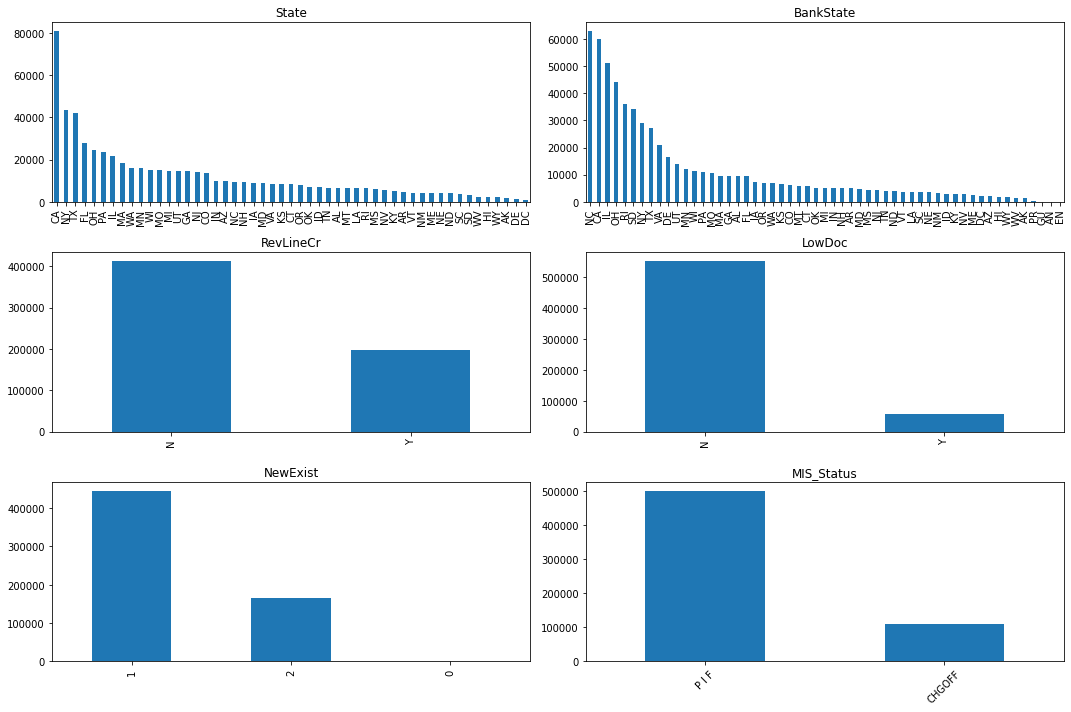

In [85]:
categorical_columns = ["State", "BankState", "RevLineCr", "LowDoc", "NewExist", "MIS_Status"]

fig, axs = plt.subplots(3, 2, figsize=(15, 10))

for col, ax in zip(categorical_columns, axs.flatten()):
    # print(col, ax)
    # plt.
    df_raw[col].value_counts().plot(kind="bar", title=col, ax=ax)
    # df_tmp = df_raw[col].value_counts().reset_index()
    # ax.bar(x=df_tmp["index"], height=df_tmp[col])
    # print(df_raw[col].value_counts())
    plt.xticks(rotation = 45)
plt.tight_layout()
